# L96 figures and animations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from L96 import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Load initial conditions for L96 model
initX, initY = np.load('./initX.npy'), np.load('./initY.npy')
np.random.seed(123)

## Run initial models

In [4]:
l96_one = L96OneLevel(X_init=initX)

In [5]:
l96_one.iterate(10)

In [6]:
l96_two = L96TwoLevel(save_dt=0.001, X_init=initX, Y_init=initY)

In [7]:
l96_two.iterate(10)

In [8]:
h1 = l96_one.history
h2 = l96_two.history

In [9]:
h2

<xarray.Dataset>
Dimensions:   (time: 10001, x: 36, y: 360)
Coordinates:
  * time      (time) float64 0.0 0.001 0.002 0.003 ... 9.997 9.998 9.999 10.0
  * x         (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    X         (time, x) float64 7.222 2.999 1.425 3.226 ... -1.605 3.599 5.081
    B         (time, x) float64 -3.124 -1.743 -0.7543 ... 0.4533 -1.158 -2.23
    Y_mean    (time, x) float64 0.3124 0.1743 0.07543 ... -0.0446 0.1172 0.2215
    Y2_mean   (time, x) float64 0.19 0.05604 0.006333 ... 0.01672 0.0443 0.1178
    X_repeat  (time, y) float64 7.222 7.222 7.222 7.222 ... 5.081 5.081 5.081
    Y         (time, y) float64 0.1251 0.4696 -0.06133 ... 0.5112 0.4959 0.05107

## Visualize evolution

In [10]:
x_theta = [2*np.pi /36 * i for i in range(37)]
y_theta = [2*np.pi /360 * i for i in range(361)]

In [11]:
def add_point(x):
    return np.append(x.values, x[0])

### One level

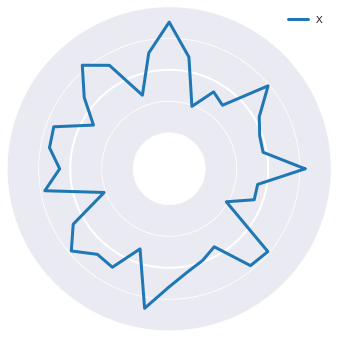

In [12]:
fig = plt.figure(figsize=(5, 5))
#ax1 = plt.axes([0, 0, 0.4, 1], projection='polar')
ax1 = fig.add_subplot(111, projection='polar')
ax1.plot(x_theta, add_point(h1.X[-1]), lw=3, zorder=10, label='X')
#ax1.plot(y_theta, add_point(h.Y[-1])*10, lw=3)
ax1.set_rmin(-14); ax1.set_rmax(14)
l = ax1.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l.set_linewidth(2)
ax1.set_thetagrids([])
ax1.set_rorigin(-22)
ax1.legend(frameon=False, loc=1);
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

In [13]:
import matplotlib.animation as animation
from IPython.display import HTML
#fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111, projection='polar')

fig = plt.figure(figsize=(5, 5))
#ax1 = plt.axes([0, 0, 0.4, 1], projection='polar')
ax1 = fig.add_subplot(111, projection='polar')
linex1, = ax1.plot(x_theta, add_point(h1.X[-1]), lw=3, zorder=10, label='X')
# liney1, = ax1.plot(y_theta, add_point(h1.Y[-1])*10, lw=3)
ax1.set_rmin(-14); ax1.set_rmax(14)
l = ax1.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l.set_linewidth(2)
ax1.set_thetagrids([])
ax1.set_rorigin(-22)
ax1.legend(frameon=False, loc=1);
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

def init():
    linex1.set_data([], [])
#     liney1.set_data([], [])
#     linex2.set_data([], [])
#     liney2.set_data([], [])
    return linex1, #liney1, linex2, liney2

def animate(i):
    x = add_point(h1.X[i*8+1000])
#     y = add_point(h1.Y[i*3+1000])*10
    linex1.set_data(x_theta, x)
#     liney1.set_data(y_theta, y)
#     linex2.set_data(x_theta, x)
#     liney2.set_data(y_theta, y)
    return linex1, #liney1, linex2, liney2

ani = animation.FuncAnimation(fig, animate, frames=200,
                              interval=25, blit=True, init_func=init)
plt.close()

In [1]:
%%time
HTML(ani.to_jshtml())

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 16.2 µs


In [15]:
#ani.save('/home/s/S.Rasp/tmp/L96_1.mp4', dpi=200)

### Two level

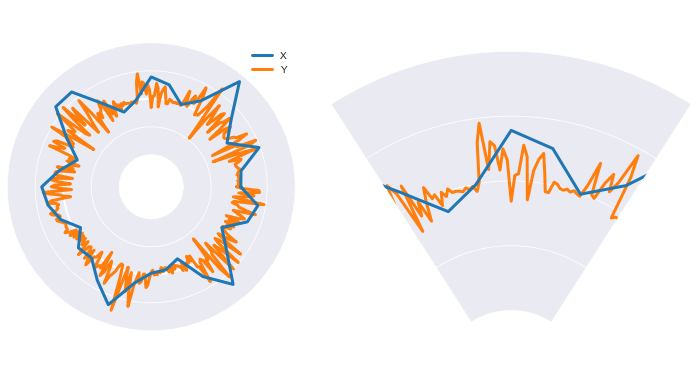

In [16]:
fig = plt.figure(figsize=(10, 5))
ax1 = plt.axes([0, 0, 0.4, 1], projection='polar')
#ax1 = fig.add_subplot(121, projection='polar')
ax1.plot(x_theta, add_point(h2.X[-1]), lw=3, zorder=10, label='X')
ax1.plot(y_theta, add_point(h2.Y[-1])*10, lw=3, label='Y')
ax1.set_rmin(-14); ax1.set_rmax(14)
l = ax1.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l.set_linewidth(2)
ax1.set_thetagrids([])
ax1.set_rorigin(-22)
ax1.legend(frameon=False, loc=1);
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

ax2 = plt.axes([0.4, 0, 0.6, 1], projection='polar')
#ax2 = fig.add_subplot(122, projection='polar')
ax2.plot(x_theta, add_point(h2.X[-1]), lw=3, zorder=10)
ax2.plot(y_theta, add_point(h2.Y[-1])*10, lw=3)
ax2.set_rmin(-14); ax2.set_rmax(14)
ax2.set_thetalim(0+1, np.pi-1)
l2 = ax2.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l2.set_linewidth(20)
ax2.set_thetagrids([])
ax2.set_rorigin(-22)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

In [18]:
import matplotlib.animation as animation
from IPython.display import HTML
#fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111, projection='polar')

fig = plt.figure(figsize=(10, 5))
ax1 = plt.axes([0.05, 0, 0.4, 1], projection='polar')
#ax1 = fig.add_subplot(121, projection='polar')
linex1, = ax1.plot(x_theta, add_point(h2.X[-1]), lw=3, zorder=10, label='X')
liney1, = ax1.plot(y_theta, add_point(h2.Y[-1])*10, lw=3, label='Y')
ax1.set_rmin(-14); ax1.set_rmax(14)
l = ax1.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l.set_linewidth(2)
ax1.set_thetagrids([])
ax1.set_rorigin(-22)
ax1.legend(frameon=False, loc=1)

ax2 = plt.axes([0.4, 0, 0.6, 1], projection='polar')
#ax2 = fig.add_subplot(122, projection='polar')
linex2, = ax2.plot(x_theta, add_point(h2.X[-1]), lw=3, zorder=10)
liney2, = ax2.plot(y_theta, add_point(h2.Y[-1])*10, lw=3)
ax2.set_rmin(-14); ax2.set_rmax(14)
l2 = ax2.set_rgrids([-7, 0, 7], labels=['', '', ''])[0][1]
l2.set_linewidth(20)
ax2.set_thetagrids([])
ax2.set_thetalim(0+1, np.pi-1)
ax2.set_rorigin(-22)
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

def init():
    linex1.set_data([], [])
    liney1.set_data([], [])
    linex2.set_data([], [])
    liney2.set_data([], [])
    return linex1, liney1, linex2, liney2

def animate(i):
    x = add_point(h2.X[i*3+5000])
    y = add_point(h2.Y[i*3+5000])*10
    linex1.set_data(x_theta, x)
    liney1.set_data(y_theta, y)
    linex2.set_data(x_theta, x)
    liney2.set_data(y_theta, y)
    return linex1, liney1, linex2, liney2

ani = animation.FuncAnimation(fig, animate, frames=200,
                              interval=25, blit=True, init_func=init)
plt.close()

In [2]:
%%time
HTML(ani.to_jshtml())

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 13.8 µs


In [20]:
#ani.save('/home/s/S.Rasp/tmp/L96_2.mp4', dpi=200)

In [21]:
#ani.save('/home/s/S.Rasp/tmp/L96_2.gif', dpi=75, writer='imagemagick', fps=50)

## Visualize parameterization task with a linear regression

In [22]:
h2

<xarray.Dataset>
Dimensions:   (time: 10001, x: 36, y: 360)
Coordinates:
  * time      (time) float64 0.0 0.001 0.002 0.003 ... 9.997 9.998 9.999 10.0
  * x         (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    X         (time, x) float64 7.222 2.999 1.425 3.226 ... -1.605 3.599 5.081
    B         (time, x) float64 -3.124 -1.743 -0.7543 ... 0.4533 -1.158 -2.23
    Y_mean    (time, x) float64 0.3124 0.1743 0.07543 ... -0.0446 0.1172 0.2215
    Y2_mean   (time, x) float64 0.19 0.05604 0.006333 ... 0.01672 0.0443 0.1178
    X_repeat  (time, y) float64 7.222 7.222 7.222 7.222 ... 5.081 5.081 5.081
    Y         (time, y) float64 0.1251 0.4696 -0.06133 ... 0.5112 0.4959 0.05107

In [23]:
slope, intercept = np.polyfit(np.ravel(h2.X), np.ravel(h2.B), 1)
slope, intercept

(-0.3126654631105845, -0.20958107653892535)

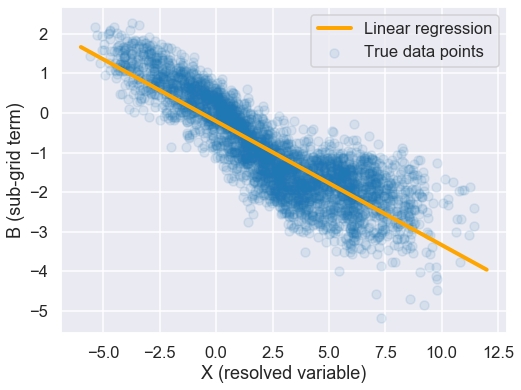

In [24]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(np.ravel(h2.X)[::100], np.ravel(h2.B)[::100], alpha=0.1, label='True data points')
plt.xlabel('X (resolved variable)'); plt.ylabel('B (sub-grid term)')
a = [-6, 12]
ax.plot(a, np.polyval([slope, intercept], a), c='orange', lw=4, label='Linear regression')
ax.legend();
fig.savefig('/home/s/S.Rasp/tmp/X-B.jpeg', dpi=200)

## Run LR model and compare statistics

In [25]:
class PolyParam():
    def __init__(self, p):
        self.p = p
    def __call__(self, x):
        return np.polyval(self.p, x)

In [26]:
l96_lr = L96TwoLevel(save_dt=0.001, X_init=initX, Y_init=initY, parameterization=PolyParam([slope, intercept]),
                     noYhist=True)

In [27]:
l96_lr.iterate(100)

In [28]:
l96_two = L96TwoLevel(save_dt=0.001, X_init=initX, Y_init=initY, noYhist=True)

In [29]:
l96_two.iterate(100)

In [30]:
hlr = l96_lr.history
h2 = l96_two.history

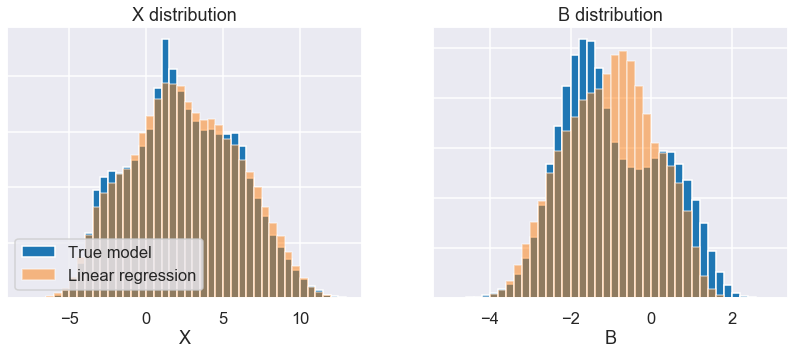

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
h2.X.plot.hist(bins=np.arange(-8, 13.5, 0.5), ax=ax1, label='True model')
hlr.X.plot.hist(bins=np.arange(-8, 13.5, 0.5), alpha=0.5, ax=ax1, label='Linear regression');
h2.B.plot.hist(bins=np.arange(-5, 3.2, 0.2), ax=ax2)
hlr.B.plot.hist(bins=np.arange(-5, 3.2, 0.2), alpha=0.5, ax=ax2);
ax1.set_yticklabels([]); ax2.set_yticklabels([])
ax1.set_title('X distribution')
ax2.set_title('B distribution')
ax1.legend(loc=3)
fig.savefig('/home/s/S.Rasp/tmp/X-B-hists.jpeg', dpi=200)

In [32]:
h2.X.mean(), hlr.X.mean()

(<xarray.DataArray 'X' ()>
 array(2.403305), <xarray.DataArray 'X' ()>
 array(2.521359))

In [33]:
h2.X.var(), hlr.X.var()

(<xarray.DataArray 'X' ()>
 array(12.205211), <xarray.DataArray 'X' ()>
 array(12.439571))

In [34]:
h2.B.mean(), hlr.B.mean()

(<xarray.DataArray 'B' ()>
 array(-0.946736), <xarray.DataArray 'B' ()>
 array(-0.997923))

In [35]:
h2.B.var(), hlr.B.var()

(<xarray.DataArray 'B' ()>
 array(1.567509), <xarray.DataArray 'B' ()>
 array(1.216094))